# Task 3: Feature importance

In [ ]:
# pip install -U scikit-learn # if necessary

In [4]:
import pickle
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import RidgeCV
from scipy.stats import pearsonr

In [ ]:
## Load data

In [5]:
with open("task3_feature-importance_data.pickle", "rb") as f:
    X, y = pickle.load(f)

## Fit model

In [6]:
X2 = np.delete(X, 8, axis=1)
model = RidgeCV()
model.fit(X2, y)
correlations_r = [pearsonr(X2[:, i], y)[0] for i in range(X2.shape[1])]
correlations_p = [pearsonr(X2[:, i], y)[1] for i in range(X2.shape[1])]
df = pd.DataFrame({
        "coef": model.coef_.flatten(),
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X2.shape[1])])
df

,coef,correlation r,correlation p
feature 0,7.549104,0.188073,6.095162e-02
feature 1,0.113974,0.092541,3.598008e-01
feature 2,38.197013,0.138256,1.701322e-01
feature 3,84.491373,0.569326,6.374702e-10
feature 4,88.326266,0.523729,2.252291e-08
feature 5,-2.902458,-0.105416,2.965699e-01
feature 6,-2.562496,-0.129693,1.984219e-01
feature 7,11.661303,0.141958,1.588725e-01
feature 8,-2.899107,-0.020712,8.379320e-01


In [ ]:
X2

array([[-1.89692831e+00,  1.23101785e+00, -8.10444201e-01,
         1.15767193e+00,  3.90553333e-01, -5.33551498e-01,
        -5.71974963e-02,  1.00000000e+00,  3.17631167e-02],
       [-1.92107945e+00,  8.90946359e-03,  2.53760291e-01,
        -1.67768380e-01, -1.13403470e+00, -2.35852270e-01,
         1.97919175e+00,  1.00000000e+00,  1.57766709e-01],
       [ 3.41980156e-01, -5.28121837e-01,  3.98201731e-02,
         1.07510718e-01,  3.85936084e-01, -9.10642768e-01,
         1.44934311e+00,  1.00000000e+00, -1.28453573e+00],
       [ 1.32515718e+00, -1.75385427e+00, -1.03580749e+00,
        -7.19374022e-01, -5.46500028e-01, -3.83988035e-01,
        -1.04587789e+00,  1.00000000e+00,  4.22197412e-01],
       [ 8.78682151e-01,  1.83198098e-01, -6.65877114e-01,
         6.44077934e-01,  3.88353719e-01, -2.58774417e-01,
         4.71133099e-01,  1.00000000e+00, -1.13250941e+00],
       [ 4.51972551e-01, -1.47141197e-01, -1.26487553e-01,
         9.84829805e-01,  5.06263584e-01, -1.233758

In [ ]:
model = RidgeCV()
model.fit(X, y)

RidgeCV()

## Analyse correlations and model coefficients

In [ ]:
correlations_r = [pearsonr(X[:, i], y)[0] for i in range(X.shape[1])]
correlations_p = [pearsonr(X[:, i], y)[1] for i in range(X.shape[1])]


In [ ]:
df = pd.DataFrame({
        "coef": model.coef_,
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X.shape[1])])
df

,coef,correlation r,correlation p
feature 0,7.025404,0.188073,6.095162e-02
feature 1,2.377854,0.092541,3.598008e-01
feature 2,33.485614,0.138256,1.701322e-01
feature 3,78.315351,0.569326,6.374702e-10
feature 4,79.870733,0.523729,2.252291e-08
feature 5,-3.739370,-0.105416,2.965699e-01
feature 6,-2.360193,-0.129693,1.984219e-01
feature 7,32.780314,0.141958,1.588725e-01
feature 8,38.077457,0.030352,7.643480e-01
feature 9,-4.928516,-0.020712,8.379320e-01


In [ ]:
# feature 7 and 8 are binary
np.unique(X[:,7]), np.unique(X[:,8])

(array([0., 1.]), array([0., 1.]))

In [ ]:
# feature 7 and 8 are mutually exclusive
((X[:,7] == 1) & (X[:,8] == 1)).sum()
((X[:,7] == 1) & (X[:,8] == 1))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [ ]:
# feature 7 and 8 nearly cover the whole dataset!
((X[:,7] == 1) | (X[:,8] == 1)).sum() / X.shape[0]

0.9

## Tasks

Feature 7 and 8 seem to be important features for the model (with coefficients > 30!). However, taking a closer look, they are both binary, mutually exclusive, and nearly cover the whole dataset. Also they are barely correlated to the outcome by themselves. I would not expect them to both have such a high importance for the model and on top of that both positive! What is going on?

#Analyse the Relationship between the different Features

First Step build up a Correlation Matrix

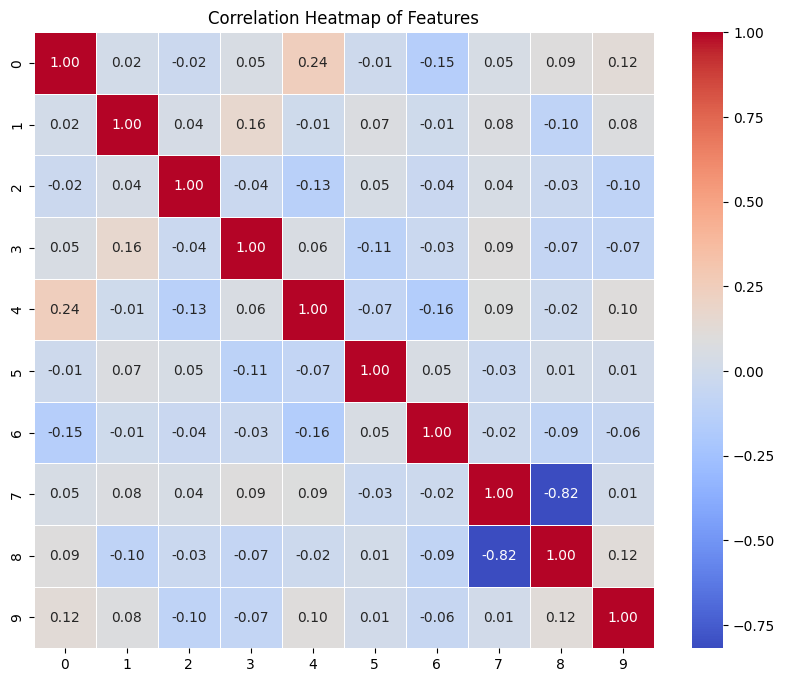

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Visualize correlations between features
plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(X).corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

It is clearly recognisable that there is a high negative correlation between variables 7 and 8. The negative correlation between the two variables indicates that there is multicorrenality.

In the second step, the data structure in the data set was analysed further. It was noticed that variables 7 and 8 have the same length and make up 90% of the data set.

In [ ]:
(X[:,7] == 1).sum()

45

In [ ]:
(X[:,8] == 1).sum()

45

In [ ]:
total_length = len(X)

print(f"The length of X is: {total_length}")

The length of X is: 100


In a third step, the VIF values of the individual features were calculated in relation to each other. However, contrary to expectations, the values are within the tolerable range.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X_df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])

# Calculating VIF
vif_data = pd.DataFrame()
vif_data['feature'] = X_df.columns
vif_data['VIF'] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif_data)

     feature       VIF
0  feature_0  1.113460
1  feature_1  1.060959
2  feature_2  1.038773
3  feature_3  1.071619
4  feature_4  1.118985
5  feature_5  1.032964
6  feature_6  1.076627
7  feature_7  1.040059
8  feature_8  1.056980
9  feature_9  1.050990


One possible explanation for the occurrence of the high coefficient but the low correlation with the outcome variable could be multicorrenality. This is made clear by the high negative correlation between F7 and F8. The reason for this problem could be that we have a categorical variable in which the reference category is only represented in 10% of the observations. The remaining observations are equally distributed across the other two categories, resulting in the strong negative correlation. An example of this could be the variable gender, for which a third category other was introduced, but which was only filled in by a few people.
Depending on the problem, you could either remove one of the two dummy variables, which would make the removed dummy variable the reference group. Alternatively, you could also remove the observations from the previous reference group from the study if you do not want to add the removed dummy variable to it.
Both variants are carried out once below.

First approch deleting one of the features

In [ ]:
X2 = np.delete(X, 8, axis=1)
model = RidgeCV()
model.fit(X2, y)
correlations_r = [pearsonr(X2[:, i], y)[0] for i in range(X2.shape[1])]
correlations_p = [pearsonr(X2[:, i], y)[1] for i in range(X2.shape[1])]
df = pd.DataFrame({
        "coef": model.coef_.flatten(),
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X2.shape[1])])
df


,coef,correlation r,correlation p
feature 0,7.549104,0.188073,6.095162e-02
feature 1,0.113974,0.092541,3.598008e-01
feature 2,38.197013,0.138256,1.701322e-01
feature 3,84.491373,0.569326,6.374702e-10
feature 4,88.326266,0.523729,2.252291e-08
feature 5,-2.902458,-0.105416,2.965699e-01
feature 6,-2.562496,-0.129693,1.984219e-01
feature 7,11.661303,0.141958,1.588725e-01
feature 8,-2.899107,-0.020712,8.379320e-01


Through this approch the problem is solved. Now the feature has less importance in the model, which, together with the low correlation, seems plausible

Second Approch deleting all Variables in wich feature 7 and 8 are both 0

In [8]:
#buildung up a dataframe with X and Y
df_X=pd.DataFrame(X)
df_X['y'] = y

In [9]:
#define the condition, that both features are 1
condition = (df_X[7] == 1) | (df_X[8] == 1)


filterd_df_X = df_X[condition]
print(filterd_df_X)

           0         1         2         3         4         5         6    7  \
0  -1.896928  1.231018 -0.810444  1.157672  0.390553 -0.533551 -0.057197  1.0   
1  -1.921079  0.008909  0.253760 -0.167768 -1.134035 -0.235852  1.979192  1.0   
2   0.341980 -0.528122  0.039820  0.107511  0.385936 -0.910643  1.449343  1.0   
3   1.325157 -1.753854 -1.035807 -0.719374 -0.546500 -0.383988 -1.045878  1.0   
4   0.878682  0.183198 -0.665877  0.644078  0.388354 -0.258774  0.471133  1.0   
..       ...       ...       ...       ...       ...       ...       ...  ...   
95  0.594217 -0.424430 -0.791374 -1.147904 -0.589355  2.221285 -1.923658  0.0   
96  0.776156  0.688326 -0.626834  0.900294 -0.058347  0.055437  0.364283  0.0   
97  0.975898 -1.284105  2.996104 -0.840940  0.053096  1.180510 -0.828198  0.0   
98  0.837520  0.436174 -0.578085  0.208117  0.420575  1.183637  0.040207  0.0   
99 -0.291328 -0.055756  0.925708 -0.627156 -0.397481 -0.111384  0.595173  0.0   

      8         9          

In [10]:
#checking for the lentgh to to ensure the results
length = len(filterd_df_X)

print(f"length of X {length}")

length of X 90


In [11]:
#deleting one of the features
filterd_df_X = filterd_df_X.drop(columns=[8])
print(filterd_df_X)

           0         1         2         3         4         5         6    7  \
0  -1.896928  1.231018 -0.810444  1.157672  0.390553 -0.533551 -0.057197  1.0   
1  -1.921079  0.008909  0.253760 -0.167768 -1.134035 -0.235852  1.979192  1.0   
2   0.341980 -0.528122  0.039820  0.107511  0.385936 -0.910643  1.449343  1.0   
3   1.325157 -1.753854 -1.035807 -0.719374 -0.546500 -0.383988 -1.045878  1.0   
4   0.878682  0.183198 -0.665877  0.644078  0.388354 -0.258774  0.471133  1.0   
..       ...       ...       ...       ...       ...       ...       ...  ...   
95  0.594217 -0.424430 -0.791374 -1.147904 -0.589355  2.221285 -1.923658  0.0   
96  0.776156  0.688326 -0.626834  0.900294 -0.058347  0.055437  0.364283  0.0   
97  0.975898 -1.284105  2.996104 -0.840940  0.053096  1.180510 -0.828198  0.0   
98  0.837520  0.436174 -0.578085  0.208117  0.420575  1.183637  0.040207  0.0   
99 -0.291328 -0.055756  0.925708 -0.627156 -0.397481 -0.111384  0.595173  0.0   

           9           y  


define the Variables X and Y again out of the dataframe

In [12]:
columns_to_include = [col for col in filterd_df_X.columns if col != 'y']


X_1 = filterd_df_X[columns_to_include].values

In [ ]:
column_without_name = filterd_df_X.iloc[:, 0]


y = filterd_df_X['y']
print(y)

0      88.410998
1    -101.448586
2      60.543820
3    -187.009258
4      45.960226
         ...    
95   -182.405135
96     60.430709
97     55.818262
98     22.089660
99    -96.988458
Name: y, Length: 90, dtype: float64


Run the model again

In [ ]:
model = RidgeCV()
model.fit(X_1, y)
correlations_r = [pearsonr(X_1[:, i], y)[0] for i in range(X_1.shape[1])]
correlations_p = [pearsonr(X_1[:, i], y)[1] for i in range(X_1.shape[1])]
df = pd.DataFrame({
        "coef": model.coef_.flatten(),
        "correlation r": correlations_r,
        "correlation p": correlations_p},
    index=[f"feature {i}" for i in range(X_1.shape[1])])
df

,coef,correlation r,correlation p
feature 0,-0.663449,0.145965,1.698284e-01
feature 1,4.947243,0.164670,1.209094e-01
feature 2,41.994668,0.237661,2.409877e-02
feature 3,79.675236,0.756856,6.199034e-18
feature 4,71.757447,0.564353,6.915090e-09
feature 5,-4.818838,-0.148077,1.636692e-01
feature 6,2.264529,-0.089182,4.032148e-01
feature 7,-7.506209,0.086365,4.182893e-01
feature 8,-2.609760,-0.059479,5.776122e-01


The tables above show that the removal of the one dummy variable causes the value of the coefficient 7 to fall sharply. This effect is greater in the variant where the original reference group was removed. The feature 7 now has a negative coefficient. This effect may have been caused by removing the base group. The effect in this variant is the most undistorted